In [1]:

#Import libraries:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16, 8)
import matlab.engine


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v3(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

'/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication'

In [3]:
eng.quit()

In [4]:
X=pd.read_csv('Atrain_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('Atrain2.csv',header=None)
X_valid = pd.read_csv('Avalid2.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('Atest2.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [5]:
def modelfit(alg, train_data,train_labels, predictors,performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_data,train_labels)
        
    #Predict training set:
    train_predictions = alg.predict(train_data)
    train_predprob = alg.predict_proba(train_data)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,train_data,train_labels,cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(train_labels, train_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(train_labels, train_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    #print (train_predictions)     


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.7040994 | Std - 0.06791092 | Min - 0.5709877 | Max - 0.7521368


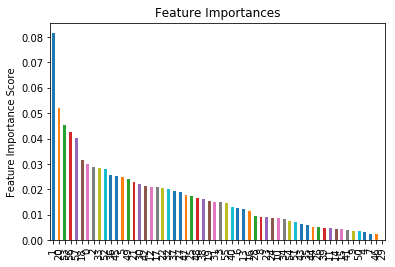

In [6]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0,X,y,predictors )


In [9]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
param_test1 = {'n_estimators':np.arange(10,500,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=2,min_samples_leaf=25,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [10]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.70709, std: 0.06274, params: {'n_estimators': 10},
  mean: 0.71811, std: 0.05174, params: {'n_estimators': 20},
  mean: 0.70799, std: 0.05393, params: {'n_estimators': 30},
  mean: 0.70409, std: 0.05497, params: {'n_estimators': 40},
  mean: 0.71671, std: 0.05151, params: {'n_estimators': 50},
  mean: 0.71943, std: 0.06024, params: {'n_estimators': 60},
  mean: 0.72346, std: 0.05946, params: {'n_estimators': 70},
  mean: 0.73150, std: 0.05533, params: {'n_estimators': 80},
  mean: 0.72272, std: 0.05495, params: {'n_estimators': 90},
  mean: 0.72619, std: 0.05836, params: {'n_estimators': 100},
  mean: 0.72566, std: 0.05509, params: {'n_estimators': 110},
  mean: 0.71978, std: 0.05711, params: {'n_estimators': 120},
  mean: 0.72502, std: 0.06056, params: {'n_estimators': 130},
  mean: 0.72326, std: 0.05588, params: {'n_estimators': 140},
  mean: 0.72766, std: 0.05505, params: {'n_estimators': 150},
  mean: 0.72572, std: 0.05113, params: {'n_estimators': 160},
  mean: 0.72960, 

In [11]:
#param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(2,11,1)}
param_test2 = {'max_depth':np.arange(1,100,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=290, max_features='sqrt', subsample=0.8, min_samples_split=2,min_samples_leaf=25,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75398, std: 0.06235, params: {'max_depth': 1},
  mean: 0.73819, std: 0.05885, params: {'max_depth': 2},
  mean: 0.71980, std: 0.06842, params: {'max_depth': 3},
  mean: 0.72960, std: 0.05468, params: {'max_depth': 4},
  mean: 0.73356, std: 0.05869, params: {'max_depth': 5},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 6},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 7},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 8},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 9},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 10},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 11},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 12},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 13},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 14},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 15},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 16},
  mean: 0.72517, std: 0.05578, params: {'max_depth': 17},
  mean: 0.72517, std: 0


Model Report
Accuracy : 0.9521
AUC Score (Train): 0.991270
CV Score : Mean - 0.7539807 | Std - 0.06235344 | Min - 0.6553498 | Max - 0.8440171


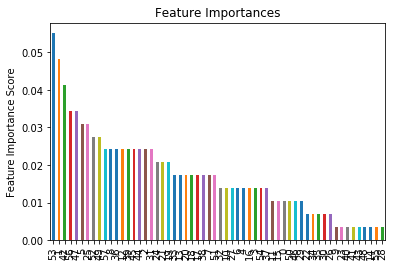

In [12]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [14]:
param_test3 = {'min_samples_split':np.arange(2,5,1), 'min_samples_leaf':np.arange(1,60,1)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=290,max_depth=1,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_
gsearch3.best_params_, gsearch3.best_score_


({'min_samples_leaf': 31, 'min_samples_split': 2}, 0.7728157644824311)


Model Report
Accuracy : 0.9521
AUC Score (Train): 0.991270
CV Score : Mean - 0.7539807 | Std - 0.06235344 | Min - 0.6553498 | Max - 0.8440171


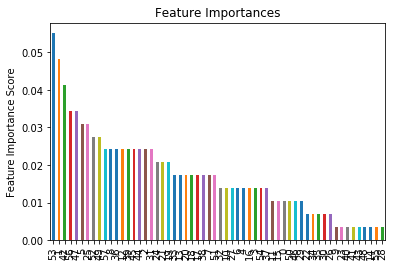

In [15]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [18]:
param_test4 = {'max_features':np.arange(1,59,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=290,max_depth=1, min_samples_split=2, min_samples_leaf=31, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
#gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 7}, 0.7728157644824311)


Model Report
Accuracy : 0.9521
AUC Score (Train): 0.991270
CV Score : Mean - 0.7539807 | Std - 0.06235344 | Min - 0.6553498 | Max - 0.8440171


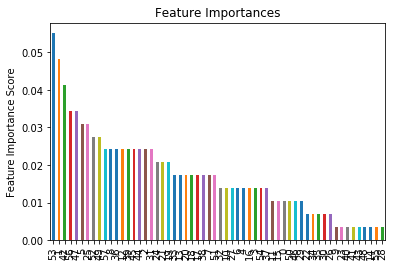

In [19]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [20]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=290,max_depth=1, min_samples_split=2, min_samples_leaf=31, subsample=0.8,max_features=7, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.68741, std: 0.08018, params: {'subsample': 0.6},
  mean: 0.71111, std: 0.04649, params: {'subsample': 0.7},
  mean: 0.70534, std: 0.05701, params: {'subsample': 0.75},
  mean: 0.71421, std: 0.06576, params: {'subsample': 0.8},
  mean: 0.70354, std: 0.06794, params: {'subsample': 0.85},
  mean: 0.72392, std: 0.09687, params: {'subsample': 0.9},
  mean: 0.71774, std: 0.08535, params: {'subsample': 0.95}],
 {'subsample': 0.9},
 0.7239244663382595)

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
#import pdb
#pdb.set_trace()
#gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
 #             learning_rate=0.2, n_estimators=80,max_depth=5,min_samples_split=11,min_samples_leaf=4, subsample=0.8, random_state=10, 
  #                                max_features=7,warm_start=False)
gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, n_estimators=200,max_depth=1, min_samples_split=2,min_samples_leaf=31, subsample=0.9, random_state=10, 
                                  max_features=7,warm_start=False)
gbm_tuned_1.fit(X_train, y_train)
#gbm_tuned_1.score(X_test,y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=1,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=31, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=10, subsample=0.9, verbose=0,
              warm_start=False)

In [44]:
    
#from sklearn.ensemble import GradientBoostingClassifier
#import pdb
#pdb.set_trace()
#model= GradientBoostingClassifier(criterion='friedman_mse', init=None,
#              learning_rate=0.001, loss='deviance', max_depth=5,
 #              min_samples_leaf=10,min_samples_split=5,
  #            n_estimators=20000, presort='auto', random_state=10, subsample=0.8, verbose=0,
   #           warm_start=False)

#model.fit(X_train, y_train)
#model.score(X_valid,y_valid)
#y_pred = model.predict(X_test) 
#gbm_tuned_1.score(X_valid,y_valid)
y_pred = gbm_tuned_1.predict(X_valid) 
gbm_tuned_1.score(X_valid,y_valid)

0.6825396825396826

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
svm_roc_auc = roc_auc_score(y_valid, y_pred)

In [46]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of GTB classifier: {:.2f}'.format(gbm_tuned_1.score(X_valid, y_valid)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_valid,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_valid, y_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Sensitivity :', sensitivity1 )
print('\n')
specificity1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Specificity :', specificity1)
print('\n')
precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('precision :', precision)
print('\n')
#from sklearn.metrics import precision_score
#print("Precision score: {}".format(precision_score(y_valid,y_pred)))
#print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_valid,y_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_valid, y_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_valid, gbm_tuned_1.predict_proba(X_valid)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of GTB classifier: 0.68


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       23        9
Predicted Class 0       11       20




[[23  9]
 [11 20]]
Sensitivity : 0.6764705882352942


Specificity : 0.6896551724137931


precision : 0.71875


F1 Score: 0.6666666666666667


Matthews Correlation Coefficient: 0.3650168461566475


AUC: 0.746




In [51]:
predictors = [x for x in X.columns]
#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=40, max_features=55, subsample=0.7,max_depth=5,min_samples_split=12,min_samples_leaf=5, random_state=10,warm_start=False)
gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, n_estimators=290,max_depth=1, min_samples_split=2,min_samples_leaf=31, subsample=0.9, random_state=10, 
                                  max_features=7,warm_start=False)




gbm_tuned_1.fit(X,y)


y_test_pred = gbm_tuned_1.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

In [52]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of GTB classifier: {:.2f}'.format(gbm_tuned_1.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity


sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Sensitivity :', sensitivity1 )
print('\n')
specificity1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Specificity :', specificity1)
print('\n')
precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('precision :', precision)
print('\n')
#from sklearn.metrics import precision_score
#print("Precision score: {}".format(precision_score(y_valid,y_pred)))
#print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, gbm_tuned_1.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of GTB classifier: 0.67


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       61       16
Predicted Class 0       26       23




[[61 16]
 [26 23]]
Sensitivity : 0.7011494252873564


Specificity : 0.5897435897435898


precision : 0.7922077922077922


F1 Score: 0.5227272727272727


Matthews Correlation Coefficient: 0.2758556098317158


AUC: 0.721


